<a href="https://colab.research.google.com/github/JorgeCandido/ImersaoDados/blob/main/DesafioImersaoDadosAula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/ddff4f29df0d6470dd59910553899e549d0b5806/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte)
dados.head() #Comando Head exibe somente as 5 primeiras linhas do arquivo // Cada linha abaixo representa um inscrito no ENEM

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [4]:
dados.shape #Comnando 'shape' mostra o total de linhas e colunas da base de dados

(127380, 136)

Desafio1: Proporção dos inscritos por idades.

Desafio2: Descobrir de quais estados são os inscritos de Treze anos.
*texto em itálico*
Desafio3: Adicionar título no gráfico.

Desafio4: Fazer histograma de quem é Treineiro ou não. Uma tabela em cima da outra.

Desafio5: Comparar as distribuições das provas de ingles e espanhol

Desafio6: Explorar a documentação do MATPLOT



# Desafio 1: Proporção dos inscritos por idades


In [10]:
idades = dados["NU_IDADE"].value_counts() 
(idades/127380) * 100

18    16.840948
17    16.687078
19    11.318888
20     8.174753
16     6.146962
        ...    
75     0.001570
73     0.001570
82     0.000785
77     0.000785
76     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

# Desafio 2: Descobrir de quais estados são os inscritos de Treze anos

In [13]:
dados.query("NU_IDADE == 13")[["NU_IDADE", "SG_UF_RESIDENCIA"]]

,NU_IDADE,SG_UF_RESIDENCIA
57359,13,SP
95630,13,MT
98197,13,AP
116501,13,BA


#Desafio 3: Adicionar título no gráfico

Text(0.5, 1.0, 'Distribuição de Inscritos por Idade')

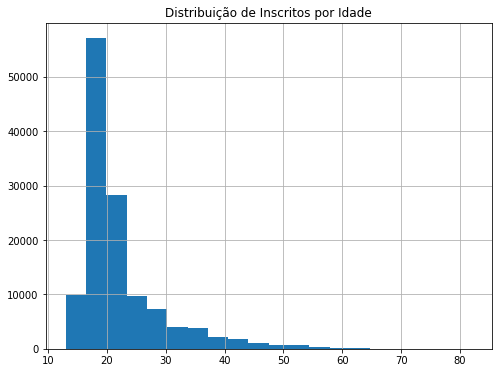

In [19]:
dados['NU_IDADE'].hist(bins = 20, figsize = (8,6))
plt.title('Distribuição de Inscritos por Idade')


# Desafio 4: Proporção de Treineiros por Idade

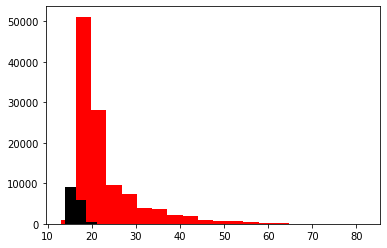

In [21]:
treineiros = dados.query("IN_TREINEIRO == 1")["NU_IDADE"]
nao_treineiros = dados.query("IN_TREINEIRO == 0")["NU_IDADE"]
plt.hist(nao_treineiros, bins=20, color="red")
plt.hist(treineiros, bins=20, color="black" )
plt.show()

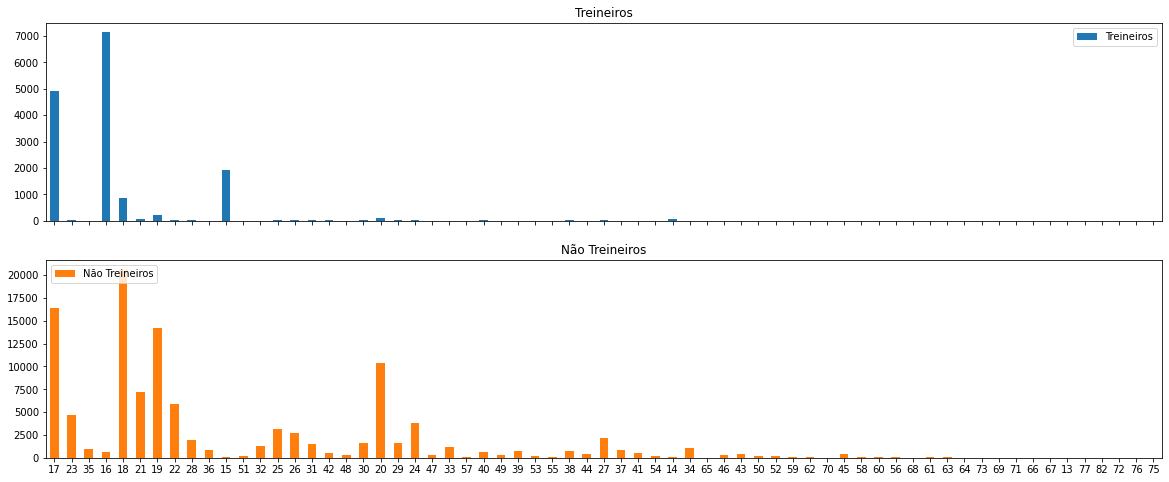

In [24]:
treineiross = dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts()
n_treineiross = dados.query("IN_TREINEIRO == 0")["NU_IDADE"].value_counts()
index = dados['NU_IDADE'].unique()

dataTreineiros = pd.DataFrame({
    'Treineiros' : treineiross, 
    'Não Treineiros' : n_treineiross
}, 
index=index)

grafico = dataTreineiros.plot.bar(rot=0, figsize=(20,8), subplots=True)
grafico[1].legend(loc=2)


#Desafio 5: Distribuição das notas das provas de ingles e espanhol

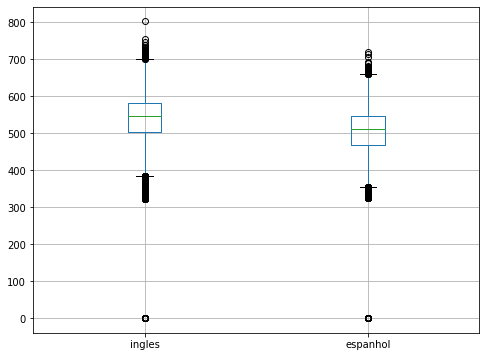

In [28]:
linguas = {
    'ingles' : dados.query("TP_LINGUA == 0")["NU_NOTA_LC"],
    'espanhol' : dados.query("TP_LINGUA == 1")["NU_NOTA_LC"],
}

dadosLinguas = pd.DataFrame(linguas)
dadosLinguas.plot.box(grid = True, figsize=(8,6))

## Desafio 6: Explorar a documentação do matplot

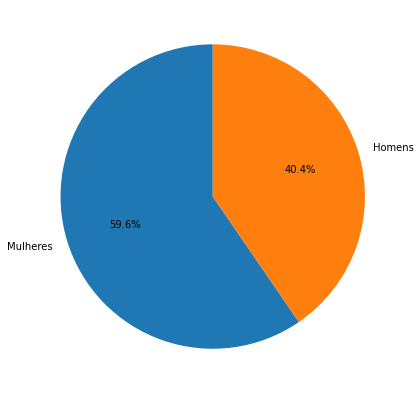

In [27]:
genero = ['Mulheres', 'Homens' ]
inscritos = dados['TP_SEXO'].value_counts().sort_index()

plt.figure(figsize=(7,7))
plt.pie(x=inscritos, labels=genero, autopct='%1.1f%%', startangle=90)
plt.show()

Text(0.5, 1.0, 'Distribuição de Pessoas por cor da pele')

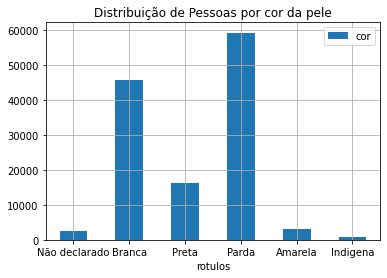

In [25]:
dataCor = pd.DataFrame({
    'rotulos' : ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indigena'],
    'cor' : dados['TP_COR_RACA'].value_counts().sort_index()

})
grafico = dataCor.plot.bar(x='rotulos', y='cor', rot=0, grid=True)
plt.title('Distribuição de Pessoas por cor da pele')